In [1]:
# 이미지 불러오는 모듈
from glob import glob

import cv2 as cv # opencv

# 기본모듈
import numpy as np

# 딥러닝
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Flatten, BatchNormalization, Dropout
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.applications import VGG16, VGG19

In [2]:
import matplotlib.pyplot as plt

In [3]:
# 이미지 파일경로 전부 불러와서 리스트에 저장
file_list = glob('./data/train/*.jpg')

In [15]:
file_list

['./data/train\\cat.0.jpg',
 './data/train\\cat.1.jpg',
 './data/train\\cat.10.jpg',
 './data/train\\cat.100.jpg',
 './data/train\\cat.1000.jpg',
 './data/train\\cat.1001.jpg',
 './data/train\\cat.1002.jpg',
 './data/train\\cat.1003.jpg',
 './data/train\\cat.1004.jpg',
 './data/train\\cat.1005.jpg',
 './data/train\\cat.1006.jpg',
 './data/train\\cat.1007.jpg',
 './data/train\\cat.1008.jpg',
 './data/train\\cat.1009.jpg',
 './data/train\\cat.101.jpg',
 './data/train\\cat.1010.jpg',
 './data/train\\cat.1011.jpg',
 './data/train\\cat.1012.jpg',
 './data/train\\cat.1013.jpg',
 './data/train\\cat.1014.jpg',
 './data/train\\cat.1015.jpg',
 './data/train\\cat.1016.jpg',
 './data/train\\cat.1017.jpg',
 './data/train\\cat.1018.jpg',
 './data/train\\cat.1019.jpg',
 './data/train\\cat.102.jpg',
 './data/train\\cat.1020.jpg',
 './data/train\\cat.1021.jpg',
 './data/train\\cat.1022.jpg',
 './data/train\\cat.1023.jpg',
 './data/train\\cat.1024.jpg',
 './data/train\\cat.1025.jpg',
 './data/train\\cat

In [4]:
# 0번째 이미지만 불러오기
x = plt.imread(file_list[0])

In [5]:
x.shape

(374, 500, 3)

In [6]:
type(x)

numpy.ndarray

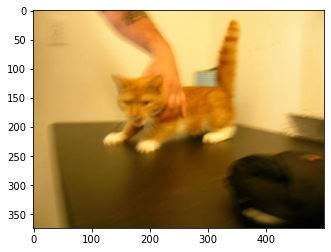

In [7]:
plt.imshow(x)

In [8]:
# 파일 사이즈가 전부 다르기 때문에 사이즈를 맞춰줘야함
for file in file_list[:5]:
    print(plt.imread(file).shape)

(374, 500, 3)
(280, 300, 3)
(499, 489, 3)
(499, 403, 3)
(149, 150, 3)


In [36]:
x = plt.imread(file_list[0])

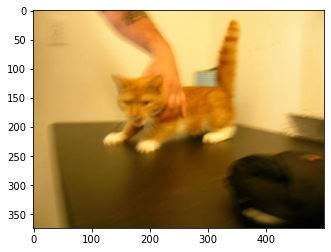

In [37]:
plt.imshow(x)

(150, 150, 3)


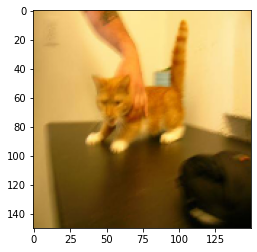

In [38]:
# 0번째 파일을 150,150 크기로 변환하기
x = cv.resize(plt.imread(file_list[0]), (150,150))
plt.imshow(x)
print(x.shape)

In [39]:
# train값 받을 리스트 생성
X = np.zeros((3000,150,150,3))
X.shape

(3000, 150, 150, 3)

In [17]:
# X랑 y 생성
y = []
for idx, file in enumerate(file_list):
    x = plt.imread(file)
    x = cv.resize(x,(150,150))
    X[idx] = x
    if 'cat' in file:
        y.append(0)
    else:
        y.append(1)

In [18]:
X.shape

(3000, 150, 150, 3)

In [19]:
y = np.array(y)
y.shape

(3000,)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [21]:
input_shape = X_train.shape[1:]

In [22]:
model = Sequential(
    [
        Conv2D(50,(5,5),activation='relu',input_shape=input_shape),
        MaxPooling2D((3,3)),
        BatchNormalization(),
        Conv2D(150,(3,3),activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128,activation='relu'),
        Dense(1,activation='sigmoid')
    ]
)

In [23]:
opt = Adam(1e-5)
loss = 'binary_crossentropy'
metrics = ['accuracy']

model.compile(optimizer=opt,
             loss=loss,
             metrics=metrics
             )

In [24]:
dog_cat_callbacks = [
    EarlyStopping(patience=7),
    TensorBoard(log_dir='./dog_cat_logs')
]

model.fit(X_train,
         y_train,
         epochs=5,
         batch_size=500,
         validation_data=(X_test,y_test),
         callbacks=dog_cat_callbacks)

Epoch 1/5
5/5 [==============================] - 43s 8s/step - loss: 0.8646 - accuracy: 0.4987 - val_loss: 2.3191 - val_accuracy: 0.5107
Epoch 2/5
5/5 [==============================] - 54s 11s/step - loss: 0.7029 - accuracy: 0.5729 - val_loss: 1.5889 - val_accuracy: 0.4880
Epoch 3/5
5/5 [==============================] - 56s 11s/step - loss: 0.6641 - accuracy: 0.5996 - val_loss: 0.8261 - val_accuracy: 0.5587
Epoch 4/5
5/5 [==============================] - 50s 10s/step - loss: 0.6303 - accuracy: 0.6498 - val_loss: 0.9817 - val_accuracy: 0.5413
Epoch 5/5
5/5 [==============================] - 48s 9s/step - loss: 0.6013 - accuracy: 0.6662 - val_loss: 0.7604 - val_accuracy: 0.5920


In [21]:
inds = np.random.choice(np.arange(1000),100,replace=False)
inds

array([ 83, 941, 419, 207, 552, 164, 410, 245, 131, 135, 671, 372, 238,
       312, 412, 752, 532, 673, 874, 107,  51, 883, 690,  78, 139,   3,
       591, 649, 509, 261, 385, 786, 539, 923, 192, 106, 614, 437, 597,
       765, 339, 617,  10, 928,  95, 103, 301, 589, 762, 609, 978, 855,
       189, 272, 670, 699,  99, 205, 270, 744, 425, 228,  74, 951, 756,
       924,  84, 865, 982, 263, 948, 498, 894, 523, 464, 696, 651, 217,
       680, 892, 665, 826, 818,  58, 755, 980, 659, 130,  39, 158, 375,
       579, 664, 474, 182, 526, 368, 838, 768, 496])